# Deep Learning Masterclass: Handwritten Digit Recognition (MNIST)

Welcome to this **comprehensive, end-to-end tutorial** on Deep Learning. 

## Objective
We will build a generic computer vision system capable of recognizing handwritten digits with high accuracy (>98%). We will use the **MNIST Database** (Modified National Institute of Standards and Technology database), which is often called the "Hello World" of Machine Learning.

## Tech Stack
*   **Language**: Python 3.x
*   **Vison Library**: TensorFlow / Keras
*   **Data Processing**: NumPy
*   **Visualization**: Matplotlib

---

## 1. Environment & Tools Setup

We need to initialize our environment. We will also set random seeds. 
*   **Why seeds?** Neural networks start with random weights. If we don't fix the seed, every run will give slightly different results. Fixing it ensures reproducibility.

In [ ]:
# Install necessary packages if not already installed
%pip install tensorflow numpy matplotlib seaborn visualkeras


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. Set Random Seeds
tf.random.set_seed(42)
np.random.seed(42)

# 2. Check Hardware
print(f"TensorFlow Version: {tf.__version__}")
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
    print(f"Success! GPU Found: {gpu_devices}")
else:
    print("Running on CPU.")

## 2. The MNIST Database

The MNIST database contains **70,000 images** of digits written by high school students and Census Bureau employees in the US. 

### Data Splits
*   **Training Set (60,000 images)**: Used to teach the model.
*   **Test Set (10,000 images)**: Used to grade the model.

Each image is **28x28 pixels** in Grayscale (black and white).

In [ ]:
# Load the dataset directly from Keras
(x_train_raw, y_train), (x_test_raw, y_test) = keras.datasets.mnist.load_data()

print(f"Training Data Shape: {x_train_raw.shape} (60k images, 28x28 pixels)")
print(f"Test Data Shape:     {x_test_raw.shape} (10k images)")

# Let's check the labels
print(f"First 10 Labels: {y_train[:10]}")

### Visualizing the Data
Before modeling, **always look at your data**. 
Below, we plot the first 25 images to understand the variance in handwriting styles.

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_raw[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## 3. Preprocessing: Preparing Data for the Brain

### Normalization
Raw pixel values range from **0 (black)** to **255 (white)**. 
Neural networks work best with small numbers (usually between 0 and 1). Large inputs can cause gradients to explode or vanish, making learning impossible.

**Strategy**: Divide by 255.0.

In [ ]:
x_train = x_train_raw / 255.0
x_test = x_test_raw / 255.0

print(f"Max pixel value before: {x_train_raw.max()}")
print(f"Max pixel value after:  {x_train.max()}")

## 4. Model Architecture: The Multi-Layer Perceptron (MLP)

### Understanding the Feed Forward Network
We will build a Multilayer Perceptron (MLP). It functions by passing information from an input layer, through hidden layers, to an output layer.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Multi-layer_Neural_Network-Vector.svg/640px-Multi-layer_Neural_Network-Vector.svg.png" alt="Neural Network Diagram" width="500"/>
*Credit: Wikimedia Commons*

Here is the blueprint:

1.  **Flatten Layer**: 
    *   Input: 28x28 matrix.
    *   Action: Unrolls it into a single line of 784 pixels ($28 \times 28$).
    *   Output: Vector of size 784.

2.  **Dense Layer 1 (Hidden)**:
    *   Units: 128 neurons. A "hidden" layer extracts features (curves, loops).
    *   **Activation='ReLU'**: 
        *   *Rectified Linear Unit*. Formula: $f(x) = max(0, x)$.
        *   **Why?** It introduces non-linearity. Without it, the network is just a linear regression model and can't learn complex shapes.

    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/640px-Activation_rectified_linear.svg.png" alt="ReLU Function" width="300"/>
    
3.  **Dropout Layer**:
    *   Rate: 0.2 (20%).
    *   **Why?** This is a specific request to handle **Overfitting**. It randomly disables 20% of neurons during training to stop the model from "memorizing" specific pixels.

4.  **Dense Layer 2 (Output)**:
    *   Units: 10 neurons (one for each digit 0-9).
    *   Output: Logits (raw scores) indicating how much the model thinks the image belongs to that class.

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28), name='Flatten_Input'),
    layers.Dense(128, activation='relu', name='Hidden_Layer_1'),
    layers.Dropout(0.2, name='Dropout_Regularization'),
    layers.Dense(10, name='Output_Layer') # No activation here, raw logits
])

model.summary()

/var/folders/v5/2ygh_0sx0hsdmzkwr1gz7lh80000gn/T/ipykernel_18943/972016842.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


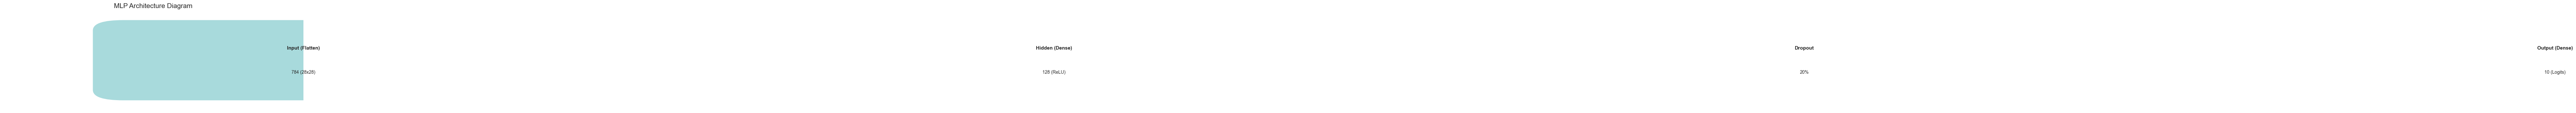

In [14]:
import matplotlib.patches as patches
import seaborn as sns

def draw_neural_net_diagram():
    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('off')
    
    # Define layer properties
    layers_info = [
        {'name': 'Input (Flatten)', 'units': '784 (28x28)', 'color': '#a8dadc'},
        {'name': 'Hidden (Dense)', 'units': '128 (ReLU)', 'color': '#457b9d'},
        {'name': 'Dropout', 'units': '20%', 'color': '#f1faee', 'edge': 'black'},
        {'name': 'Output (Dense)', 'units': '10 (Logits)', 'color': '#e63946'}
    ]
    
    # Draw boxes
    box_width = 1.2
    box_height = 0.6
    spacing = 2.5
    start_x = 1.0
    y = 0.5
    
    for i, layer in enumerate(layers_info):
        x = start_x + i * spacing
        # Draw box
        rect = patches.FancyBboxPatch((x - box_width/2, y - box_height/2), 
                                      box_width, box_height, 
                                      boxstyle="round,pad=0.1", 
                                      linewidth=2, 
                                      edgecolor=layer.get('edge', layer['color']), 
                                      facecolor=layer['color'])
        ax.add_patch(rect)
        
        # Add Text
        ax.text(x, y + 0.1, layer['name'], ha='center', va='bottom', fontsize=11, fontweight='bold')
        ax.text(x, y - 0.1, layer['units'], ha='center', va='top', fontsize=10)
        
        # Draw Arrows
        if i < len(layers_info) - 1:
            next_x = start_x + (i + 1) * spacing
            # Arrow start and end points
            ax.annotate('', xy=(next_x - box_width/2 - 0.1, y), xytext=(x + box_width/2 + 0.1, y),
                        arrowprops=dict(arrowstyle="->", lw=2, color='black'))

    plt.title('MLP Architecture Diagram', fontsize=15)
    plt.tight_layout()
    plt.show()

draw_neural_net_diagram()

In [ ]:
import visualkeras

# Visualize the model architecture
# This creates a layered view of the Neural Network
visualkeras.layered_view(model, legend=True, draw_volume=False, spacing=30)

## 5. Compilation: Loss and Optimizer

Now we define *how* the model learns.

### Gradient Descent
The optimizer tries to find the lowest point in the "Loss Landscape" (minimal error).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/640px-Gradient_descent.svg.png" alt="Gradient Descent" width="300"/>

1.  **Optimizer: Adam**
    *   Adaptive Moment Estimation. It's safe, fast, and generally the best default choice. It adjusts the learning rate automatically.

2.  **Loss Function: Sparse Categorical Crossentropy**
    *   **Categorical**: We are categorizing into classes.
    *   **Crossentropy**: Measures the distance between the predicted probability distribution and the true distribution.
    *   **from_logits=True**: Tells TensorFlow that the output layer is raw numbers, not yet Softmaxed probabilities. This is numerically more stable.

3.  **Metrics: Accuracy**
    *   We want to know the % of correct guesses.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 6. Training the Model

We will split the training data further. We keep 10% separate as a **Validation Split**.
*   **Training Data**: Used to update weights.
*   **Validation Data**: Used to check performance after every epoch. The model NEVER trains on this. It helps us spot overfitting (if training accuracy > validation accuracy).

**Hyperparameters**:
*   **Epochs = 10**: The model sees the dataset 10 times.
*   **Batch Size = 32** (Default): Updates weights after every 32 images.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

## 7. Performance Analysis

Numbers in logs are hard to read. Let's **visualize** the training process.
We want to see:
1.  **Loss**: Going down.
2.  **Accuracy**: Going up.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 8. Final Evaluation & Error Analysis

How does it perform on the **Test Set** (data it has truly never seen)?
And more importantly, **what does it get wrong?**

In [ ]:
# 1. Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# 2. Get Predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions_probs = probability_model.predict(x_test)
predictions = np.argmax(predictions_probs, axis=1)

# 3. Find Errors
errors = (predictions != y_test)
error_indices = np.where(errors)[0]
print(f"Total Errors: {len(error_indices)} out of {len(x_test)}")

# 4. Visualize top 5 Errors
plt.figure(figsize=(10, 5))
for i, idx in enumerate(error_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_raw[idx], cmap=plt.cm.binary)
    plt.xlabel(f"True: {y_test[idx]}\nPred: {predictions[idx]}", color='red')
plt.suptitle("Examples of Misclassified Digits")
plt.show()

### Confusion Matrix

The accuracy score is nice, but a **Confusion Matrix** shows us exactly *where* the model gets confused. 
Rows represent the **True Labels**, and columns represent the **Predicted Labels**. Diagonal elements are correct predictions.

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Visualizing Predictions & Probabilities

Let's look at the "confidence" of the model. We will plot the image alongside the predicted probability distribution.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
# Plot the first 15 test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_probs, y_test, x_test_raw)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_probs, y_test)
plt.tight_layout()
plt.show()

## 9. Saving and Loading the Model

Real-world models need to be saved so they can be deployed later without retraining.

In [ ]:
# Save the entire model to a HDF5 file
model.save('mnist_model.h5')
print("Model saved to disk.")

# Recreate the exact same model
new_model = tf.keras.models.load_model('mnist_model.h5')

# Check its accuracy on test data
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

## 10. Conclusion

We built a neural network that achieves high accuracy on handwritten digits. 

**Key Takeaways:**
1.  **Preprocessing Matters**: Normalizing data to [0,1] is crucial.
2.  **Activation Functions**: ReLU allows the model to learn complex, non-linear patterns.
3.  **Regularization**: Dropout helps generalize performance to new data.
4.  **Diagnostics**: Plotting Loss/Accuracy curves tells us if the model is learning well or overfitting.

You now have a deployment-ready model structure!